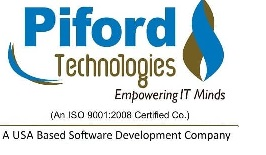

# Predict next word in a Sentence Using Recurrent Neural Network

In [2]:
from numpy import array
from keras.preprocessing.text import Tokenizer
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Embedding

Using TensorFlow backend.
c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.in

In [3]:

# source text
data = """ Piford Technologies is a leading Software Development Company\n
Piford Technologies provide trainings to working professionals and students\n
We are product based and service based company\n
we have one of our office in IT Park, Mohali\n """


In [4]:
# integer encode text
tokenizer = Tokenizer()
tokenizer.fit_on_texts([data])
encoded_data= tokenizer.texts_to_sequences([data])[0]
encoded_data

[1,
 2,
 7,
 8,
 9,
 10,
 11,
 3,
 1,
 2,
 12,
 13,
 14,
 15,
 16,
 4,
 17,
 5,
 18,
 19,
 6,
 4,
 20,
 6,
 3,
 5,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29]

In [5]:
# determine the vocabulary size
vocab_size = len(tokenizer.word_index) + 1  # 0 is reserved for padding so that's why we added 1

print('Vocabulary Size: %d' % vocab_size)



Vocabulary Size: 30


# Next, we need to create sequences of words to fit the model with one word as input and one word as output.


In [6]:
# create word -> word sequences
sequences = list()
for i in range(1, len(encoded_data)):
	sequence = encoded_data[i-1:i+1]
	sequences.append(sequence)
print('Total Sequences: %d' % len(sequences))
# split into X and y elements


Total Sequences: 34


# Running this piece shows that we have a total of 34 input-output pairs to train the network

In [7]:
sequences
#sequences[:5] # [input, output]

[[1, 2],
 [2, 7],
 [7, 8],
 [8, 9],
 [9, 10],
 [10, 11],
 [11, 3],
 [3, 1],
 [1, 2],
 [2, 12],
 [12, 13],
 [13, 14],
 [14, 15],
 [15, 16],
 [16, 4],
 [4, 17],
 [17, 5],
 [5, 18],
 [18, 19],
 [19, 6],
 [6, 4],
 [4, 20],
 [20, 6],
 [6, 3],
 [3, 5],
 [5, 21],
 [21, 22],
 [22, 23],
 [23, 24],
 [24, 25],
 [25, 26],
 [26, 27],
 [27, 28],
 [28, 29]]

# We can then split the sequences into input (X) and output elements (y)

In [8]:
sequences = array(sequences)
X, y = sequences[:,0],sequences[:,1]



In [9]:
X[:5]

array([1, 2, 7, 8, 9])

In [10]:
y[:5]

array([ 2,  7,  8,  9, 10])

In [11]:
# one hot encode outputs
y = to_categorical(y, num_classes=vocab_size)
# define model
y[:5]

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],
      dtype=float32)

In [12]:
model = Sequential()
model.add(Embedding(vocab_size, 10, input_length=1))
model.add(LSTM(50))
model.add(Dense(vocab_size, activation='softmax'))
print(model.summary())


Instructions for updating:
Colocations handled automatically by placer.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 1, 10)             300       
_________________________________________________________________
lstm_1 (LSTM)                (None, 50)                12200     
_________________________________________________________________
dense_1 (Dense)              (None, 30)                1530      
Total params: 14,030
Trainable params: 14,030
Non-trainable params: 0
_________________________________________________________________
None


In [13]:
# compile network
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])



In [14]:
# fit network
model.fit(X, y, epochs=100)


Instructions for updating:
Use tf.cast instead.
Epoch 1/100
34/34 [==============================] - 0s 10ms/step - loss: 3.4016 - accuracy: 0.0588
Epoch 2/100
34/34 [==============================] - 0s 117us/step - loss: 3.4006 - accuracy: 0.0588
Epoch 3/100
34/34 [==============================] - 0s 117us/step - loss: 3.3998 - accuracy: 0.0882
Epoch 4/100
34/34 [==============================] - 0s 176us/step - loss: 3.3992 - accuracy: 0.0882
Epoch 5/100
34/34 [==============================] - 0s 177us/step - loss: 3.3984 - accuracy: 0.0882
Epoch 6/100
34/34 [==============================] - 0s 116us/step - loss: 3.3978 - accuracy: 0.0882
Epoch 7/100
34/34 [==============================] - 0s 117us/step - loss: 3.3971 - accuracy: 0.1471
Epoch 8/100
34/34 [==============================] - 0s 147us/step - loss: 3.3964 - accuracy: 0.1471
Epoch 9/100
34/34 [==============================] - 0s 146us/step - loss: 3.3957 - accuracy: 0.1471
Epoch 10/100
34/34 [========================

34/34 [==============================] - 0s 117us/step - loss: 3.2861 - accuracy: 0.1765
Epoch 79/100
34/34 [==============================] - 0s 117us/step - loss: 3.2822 - accuracy: 0.1765
Epoch 80/100
34/34 [==============================] - 0s 117us/step - loss: 3.2783 - accuracy: 0.1765
Epoch 81/100
34/34 [==============================] - 0s 147us/step - loss: 3.2744 - accuracy: 0.2059
Epoch 82/100
34/34 [==============================] - 0s 117us/step - loss: 3.2705 - accuracy: 0.2059
Epoch 83/100
34/34 [==============================] - 0s 117us/step - loss: 3.2663 - accuracy: 0.2353
Epoch 84/100
34/34 [==============================] - 0s 147us/step - loss: 3.2622 - accuracy: 0.2353
Epoch 85/100
34/34 [==============================] - 0s 117us/step - loss: 3.2579 - accuracy: 0.2353
Epoch 86/100
34/34 [==============================] - 0s 117us/step - loss: 3.2535 - accuracy: 0.2353
Epoch 87/100
34/34 [==============================] - 0s 117us/step - loss: 3.2488 - accuracy: 

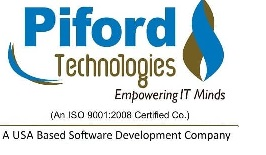

In [ ]:
enter_text=provide, n_pred=3
in_text and result =provide

In [15]:
# generate a sequence from the model
def generate_seq(model, tokenizer, enter_text, n_pred):  
	in_text, result = enter_text, enter_text  # 
	# generate a fixed number of words
	for _ in range(n_pred):
        
		# encode the text as integer
		encoded = tokenizer.texts_to_sequences([in_text])[0]
		encoded = array(encoded)
        
		# predict a word in the vocabulary
		yhat = model.predict_classes(encoded)
        
		# map predicted word index to word
		out_word = ''
		for word, index in tokenizer.word_index.items():
			if index == yhat:
				out_word = word
				break
		# append to input
		in_text, result = out_word, result + ' ' + out_word
	return result

In [16]:
# evaluate
print(generate_seq(model, tokenizer, 'Piford', 6))

Piford technologies we we we we we


In [17]:
# evaluate
print(generate_seq(model, tokenizer, 'service', 3))

service based we we
